                                Here you found the whole context of the projects. 
                                You can use this to study and make your own project
                                and also to understand where some assumptions I had
                                in my versions of these projects come from.


### Projects List

[Data Analysis - Business Insights](#Data-Analysis---Business-Insights)


[Sales Forecast](#Sales-Forecast)<br>
&nbsp;&nbsp;[Creating the Business Environment Data](#Creating-the-Business-Environment-Data)<br>
&nbsp;&nbsp;[Now We have to simulate the Project Environment](#Now-We-have-to-simulate-the-Project-Environment)

## Data Analysis - Business Insights

### Business Questions. 
_We want answers!_ 

**1 - The company's business areas have some doubts and challenges such as:**


- Can we give the same benefits to all shopkeepers (sellers)? Or is there one that deserves to be highlighted?


- Is there a difference in the amount of freight charged in different regions, cities? Or can we apply the shipping subsidy rules to any location?


- Is our product catalog comprehensive? Or does it focus on specific categories?


- Do we always sell the same products? Or are there seasonalities?


**2 - Dashboard that analyzes the company's latest sales data that can be shared with Regional leads and their respective analysts:**

- Total Sales
- Sales per Region
- Top 5 selling categories for each Region


**3 - We also need to know:**

> Number of Orders Per Day.
>
> Number of Orders per city.
>
> Number of Orders by Payment Method.

- What is the revenue for each product category? What about total sales, in units and in orders?
- What is the total amount of revenue generated by customers in each state? 
- What is the total amount of revenue generated by sellers in each state?

_delivered orders only_

## Sales Forecast

**Motivation! What's the context?**
- In 2017 Olist started to forecast its monthly sales based on the average revenue from 3 months before.<br>
But now the company  wants to be able to predict future sales more accurately with a wider time range (3 months ahead).

**Why?**
- To efficiently allocate resources for future projects, growth and manage its cash flow. 

**Who are the stakeholders?**
- The financial sector will use the forecast to the set operating budgets and to project cash flows.
- And the marketing team, who will have the opportunity to schedule promotions if it appears sales will be weak and will be able to better allocate budget among other marketing activities.

**What is the deliverable?**
- A dashboard with the information about the forecast.

> **ps: Your objective is to forecast the third quarter of 2018.**

<font color='blue'><strong>Creating the Values Estimates from the Given Context<strong><font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
__file__ = "complete_projects_proposals_and_assumptions"
BASE_DIR = os.path.dirname(os.path.abspath(__file__))
DATA_DIR = os.path.join(os.path.join(BASE_DIR, 'data'))

### Creating the Business Environment Data

In [3]:
orders = pd.read_csv("data/raw_data/olist_orders_dataset.csv")
olist_order_items = pd.read_csv("data/raw_data/olist_order_items_dataset.csv")

sales = pd.merge(orders, olist_order_items, how='left', on='order_id' )
sales = sales[sales['order_status'] == 'delivered']

sales['revenue'] = sales['price'] + sales['freight_value']
sales['order_purchase_timestamp'] = pd.to_datetime(sales['order_purchase_timestamp'])

sales_each_month = sales.groupby([sales['order_purchase_timestamp'].dt.year,
                                  sales['order_purchase_timestamp'].dt.month]).revenue.sum()
pd.DataFrame(sales_each_month)

revenue
order_purchase_timestamp order_purchase_timestamp           
2016                     9                            143.46
                         10                         46490.66
                         12                            19.62
2017                     1                         127482.37
                         2                         271239.32
                         3                         414330.95
                         4                         390812.40
                         5                         566851.40
                         6                         490050.37
                         7                         566299.08
                         8                         645832.36
                         9                         701077.49
                         10                        751117.01
                         11                       1153364.20
                         12                        843078.29
2018                     1                        1077887.46
                         2                         966168.41
                         3                        1120598.24
                         4                        1132878.93
                         5                        1128774.52
                         6                        1011978.29
                         7                        1027807.28
                         8                         985491.64

**Estimating 2017 Sales Revenue using Moving Average (from scratch).**

In [4]:
sales_month = sales_each_month.values
sales_estimations = []
for month in range(20):
    next_month_sales_estimation = (sales_month[month] + sales_month[month+1] + sales_month[month+2]) / 3
    sales_estimations.append(next_month_sales_estimation)
    
olist_sales = pd.concat([sales_each_month, pd.Series(sales_estimations, index=sales_each_month.index[3:])], axis=1).dropna()
olist_sales.columns = ['revenue', 'estimated_revenue']
olist_sales

revenue  \
order_purchase_timestamp order_purchase_timestamp              
2017                     1                         127482.37   
                         2                         271239.32   
                         3                         414330.95   
                         4                         390812.40   
                         5                         566851.40   
                         6                         490050.37   
                         7                         566299.08   
                         8                         645832.36   
                         9                         701077.49   
                         10                        751117.01   
                         11                       1153364.20   
                         12                        843078.29   
2018                     1                        1077887.46   
                         2                         966168.41   
                         3                        1120598.24   
                         4                        1132878.93   
                         5                        1128774.52   
                         6                        1011978.29   
                         7                        1027807.28   
                         8                         985491.64   

                                                   estimated_revenue  
order_purchase_timestamp order_purchase_timestamp                     
2017                     1                                  15551.25  
                         2                                  57997.55  
                         3                                 132913.77  
                         4                                 271017.55  
                         5                                 358794.22  
                         6                                 457331.58  
                         7                                 482571.39  
                         8                                 541066.95  
                         9                                 567393.94  
                         10                                637736.31  
                         11                                699342.29  
                         12                                868519.57  
2018                     1                                 915853.17  
                         2                                1024776.65  
                         3                                 962378.05  
                         4                                1054884.70  
                         5                                1073215.19  
                         6                                1127417.23  
                         7                                1091210.58  
                         8                                1056186.70

### Now We have to simulate the Project Environment

> **Where we have Data Up to 2018-3-31**
> 
> **and are trying to forecast the next 2 quarters**
>
> **(the 2nd as a test set and the 3rd as our validation set).**

**This is our realistic scenario:**

    We don't know the revenue for the months we want to forecast, thus, at some point,
    We will have to estimate using our own predictions.

In [5]:
olist_sales_project_env = olist_sales.loc[2018].copy()
olist_sales_project_env.index.name = '2018 month'
olist_sales_project_env.columns = ['known_revenue', 'estimated_revenue']
olist_sales_project_env.loc[5:] = 0
olist_sales_project_env.loc[4, 'known_revenue'] = 0
olist_sales_project_env

,known_revenue,estimated_revenue
2018 month,,
1,1077887.46,915853.17
2,966168.41,1024776.65
3,1120598.24,962378.05
4,0.00,1054884.70
5,0.00,0.00
6,0.00,0.00
7,0.00,0.00
8,0.00,0.00


**and now we'll use the data we have as well as the estimation to estimate the next months**

In [6]:
def style_specific_cell(x):
    df = pd.DataFrame('', index=x.index, columns=x.columns)    
    df.iloc[1:3,0] = df.iloc[3,1] = 'background-color: lightblue'
    df.iloc[4,1] = 'background-color: lightgreen'

    return df

olist_sales_project_env.style.apply(style_specific_cell, axis=None).format("{:.2f}")

,known_revenue,estimated_revenue
2018 month,,
1,1077887.46,915853.17
2,966168.41,1024776.65
3,1120598.24,962378.05
4,0.00,1054884.70
5,0.00,0.00
6,0.00,0.00
7,0.00,0.00
8,0.00,0.00


**and so on**

In [7]:
result = (olist_sales_project_env.loc[2:3, 'known_revenue'].sum() + olist_sales_project_env.loc[4, 'estimated_revenue']) / 3
olist_sales_project_env.loc[5, 'estimated_revenue'] = result

def style_specific_cell(x):
    df = pd.DataFrame('', index=x.index, columns=x.columns)    
    df.iloc[2:3,0] = df.iloc[3:5,1] = 'background-color: lightblue'
    df.iloc[5,1] = 'background-color: lightgreen'

    return df

olist_sales_project_env.style.apply(style_specific_cell, axis=None).format("{:.2f}")

,known_revenue,estimated_revenue
2018 month,,
1,1077887.46,915853.17
2,966168.41,1024776.65
3,1120598.24,962378.05
4,0.00,1054884.70
5,0.00,1047217.12
6,0.00,0.00
7,0.00,0.00
8,0.00,0.00


In [8]:
result = (olist_sales_project_env.loc[3, 'known_revenue'] + olist_sales_project_env.loc[4:5, 'estimated_revenue'].sum()) / 3
olist_sales_project_env.loc[6, 'estimated_revenue'] = result

def style_specific_cell(x):
    df = pd.DataFrame('', index=x.index, columns=x.columns)    
    df.iloc[3:6,1] = 'background-color: lightgrey'

    return df

olist_sales_project_env.style.apply(style_specific_cell, axis=None).format("{:.2f}")

,known_revenue,estimated_revenue
2018 month,,
1,1077887.46,915853.17
2,966168.41,1024776.65
3,1120598.24,962378.05
4,0.00,1054884.70
5,0.00,1047217.12
6,0.00,1074233.35
7,0.00,0.00
8,0.00,0.00


**Now, let's see how the Moving Average would have done in our test set.**

In [9]:
olist_sales_project_env.loc[4:6, 'known_revenue'] = olist_sales.loc[2018].loc[4:6, 'revenue']

def style_specific_cell(x):
    df = pd.DataFrame('', index=x.index, columns=x.columns)    
    df.iloc[0:3,0] = 'background-color: lightblue'
    df.iloc[0:3,1] = 'background-color: lightgrey'
    return df

olist_sales_project_env.loc[4:].style.apply(style_specific_cell, axis=None).format("{:.2f}")

,known_revenue,estimated_revenue
2018 month,,
4,1132878.93,1054884.70
5,1128774.52,1047217.12
6,1011978.29,1074233.35
7,0.00,0.00
8,0.00,0.00


In [10]:
def evaluation(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred).round(2)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    print(f'''On average, our predictions are {mape.round(2)}% above or below the real value.''')
    print(f'''Which means an error of about R$ {mae}''')

In [11]:
print("2nd Quarter Of 2018:")
evaluation(olist_sales_project_env.loc[4:6, 'known_revenue'], olist_sales_project_env.loc[4:6, 'estimated_revenue'])

2nd Quarter Of 2018:
On average, our predictions are 6.75% above or below the real value.
Which means an error of about R$ 73935.56


**Let's use this new available data to predict the next quarter.**

In [12]:
result = (olist_sales_project_env.loc[4:6, 'known_revenue'].sum()) / 3
olist_sales_project_env.loc[7, 'estimated_revenue'] = result

def style_specific_cell(x):
    df = pd.DataFrame('', index=x.index, columns=x.columns)    
    df.iloc[3:6, 0] = 'background-color: lightblue'
    df.iloc[6,1] = 'background-color: lightgreen'

    return df

olist_sales_project_env.style.apply(style_specific_cell, axis=None).format("{:.2f}")

,known_revenue,estimated_revenue
2018 month,,
1,1077887.46,915853.17
2,966168.41,1024776.65
3,1120598.24,962378.05
4,1132878.93,1054884.70
5,1128774.52,1047217.12
6,1011978.29,1074233.35
7,0.00,1091210.58
8,0.00,0.00


In [13]:
result = (olist_sales_project_env.loc[5:6, 'known_revenue'].sum() + olist_sales_project_env.loc[7, 'estimated_revenue']) / 3
olist_sales_project_env.loc[8, 'estimated_revenue'] = result

def style_specific_cell(x):
    df = pd.DataFrame('', index=x.index, columns=x.columns)    
    df.iloc[4:6,0] = df.iloc[6,1] = 'background-color: lightblue'
    df.iloc[7,1] = 'background-color: lightgreen'

    return df

olist_sales_project_env.style.apply(style_specific_cell, axis=None).format("{:.2f}")

,known_revenue,estimated_revenue
2018 month,,
1,1077887.46,915853.17
2,966168.41,1024776.65
3,1120598.24,962378.05
4,1132878.93,1054884.70
5,1128774.52,1047217.12
6,1011978.29,1074233.35
7,0.00,1091210.58
8,0.00,1077321.13


**and evaluate again**

In [14]:
olist_sales_project_env.loc[7:9, 'known_revenue'] = olist_sales.loc[2018].loc[7:9, 'revenue']

print("3rd Quarter Of 2018:")
evaluation(olist_sales_project_env.loc[7:9, 'known_revenue'], olist_sales_project_env.loc[7:9, 'estimated_revenue'])
# olist_sales_project_env

3rd Quarter Of 2018:
On average, our predictions are 7.74% above or below the real value.
Which means an error of about R$ 77616.39


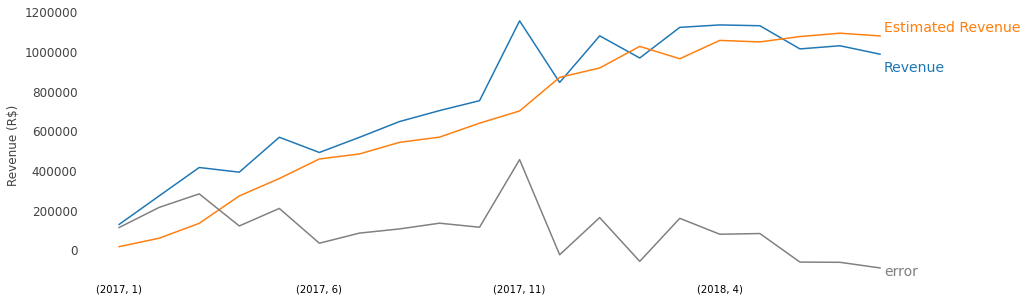

In [15]:
olist_sales.loc[2018].loc[4:, 'estimated_revenue'] = olist_sales_project_env.loc[4:, 'estimated_revenue']

error = (olist_sales['revenue'] - olist_sales['estimated_revenue'])

olist_sales.plot(figsize=(15,5), legend=False)
error.plot(color='grey')
plt.box(False)
plt.tick_params(axis='both', which='both', length=0)
plt.ticklabel_format(style='plain', axis='y')
plt.text(19.1, 900000, "Revenue", color='#1f77b4', size=14)
plt.text(19.1, 1100000, "Estimated Revenue", color='#ff7f0e', size=14)
plt.text(19.1, -130000, "error", color='#7f7f7f', size=14)
plt.ylabel("Revenue (R$)", color='#424242', size=12)
plt.yticks(color='#424242', size=12)
plt.xlabel("");

<font color='grey'><strong>I decided to save this data, since my first ML models were not good solutions.</strong></font>

_"Since We are not preprocessing any data we can use the project proposal time series itself."_

In [16]:
olist_sales.index.names = ['year', 'month']
olist_sales.columns = ['known_revenue', 'estimated_revenue']
olist_sales.to_pickle(os.path.join(os.path.join(DATA_DIR, 'sales_forecast_data'), 'olist_2017_forecasts_table_model.pkl'))